## Fraud Detection For Card-not-present (CNP) Payment Transactions 

Nichakorn Pansailom

**Problem description**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This project is a competition from Kaggle posted 3 years ago.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this project we want to check **whether the transaction is fraud (1) or not (0)?** from given variables. We consider this problem is a classification problem --> 0 or 1. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Believed that there are many advanced solutions to predict the fraud transactions under this course we will be focuding on few models to solve this problem: K-mean clustering, Logistic Regression, KNN, Decision Tree and Random Forest.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The following metrics will be taken into consideration for evalutaion our models are: Area Under the ROC Curve (ROC AUC) and Confusion Matrix.

**Dataset description**

The data in this project comes from Vesta Corporation and it is a real data. Hence, the field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement.\

The data is consisting of 2 files used for training:  <br>

*Transaction Table:* contains features of transaction
>TransactionDT: timedelta from a given reference datetime (not an actual timestamp)\
TransactionAMT: transaction payment amount in USD\
ProductCD: product code, the product for each transaction\
card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.\
addr: address\
dist: distance\
P_ and (R__) emaildomain: purchaser and recipient email domain\
C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.\
D1-D15: timedelta, such as days between previous transaction, etc.\
M1-M9: match, such as names on card and address, etc.
Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.\


*Identity Table:* contains features of users both ends
>Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.\
Categorical Features:\
DeviceType\
DeviceInfo\
id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc.\
id_12 - id_38: 




In [1]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
# import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


# 1. Load Dataset

In [4]:
pd.set_option("display.max_columns",None)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows",None)
pd.get_option("display.max_rows")

In [5]:
train_transaction = pd.read_csv(r'C:\Users\tnich\Documents\GitHub\ML\Transaction-fraud2\train_transaction2.csv')
train_identity = pd.read_csv(r'C:\Users\tnich\Documents\GitHub\ML\Transaction-fraud2\train_identity.csv')

In [6]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
del train_transaction
del train_identity

In [6]:
train.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,N

**isFraud** is a dependent data (label) in training data. **0** represent **normal transaction** and **1** represent **fraud transaction**.

# 2. Data Exploration and Preprocessing

## 2.1. Investigate isFraud value distribution

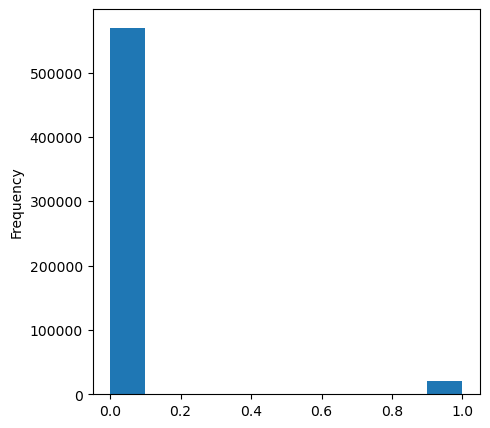

In [7]:
plt.figure(figsize=(5, 5))
train['isFraud'].astype(int).plot.hist();

From the figure above: dataset is imbalance. And Later on we will handle with this using SMOTE

[Text(0.5, 1.0, 'Transation amount\xa0Raw\xa0data')]

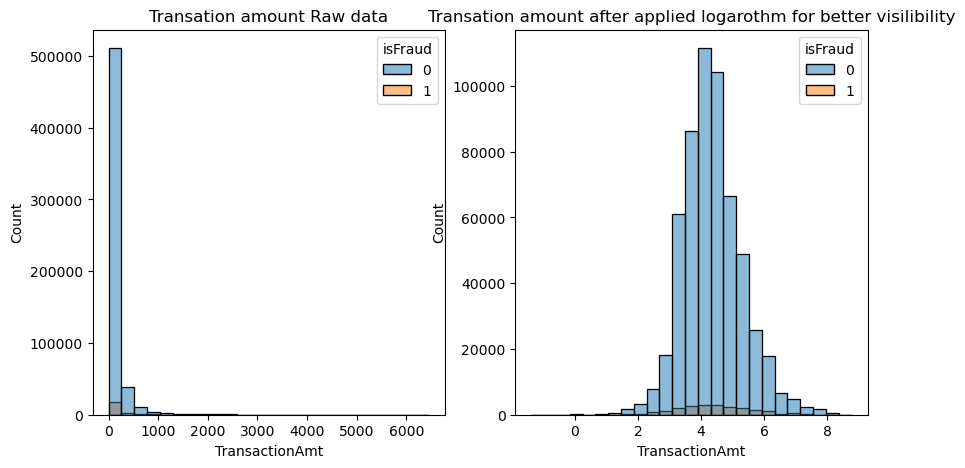

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
sns.histplot(x=np.log(train["TransactionAmt"]), hue=train["isFraud"], kde=False, bins=25, fill=True, ax=ax2).set(
    title="Transation amount after applied logarithm for better visilibility")
sns.histplot(x=train["TransactionAmt"], hue=train["isFraud"], kde=False, bins=25, fill=True, ax=ax1).set(
    title="Transation amount Raw data")

From histrogram above we can see that the target of train distrbution is **imbalanced**. Most of data contain **normal transaction labeled data (0)**.

In [8]:
def prep_data(train: pd.DataFrame) -> (np.ndarray, np.ndarray):
    #TransacAMT vs TransacDT
    X = train.iloc[:, 2:4].values 
    y = train.isFraud.values
    return X, y

In [9]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="isFraud #0", alpha=0.5, linewidth=0.15, c='c')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="isFraud #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

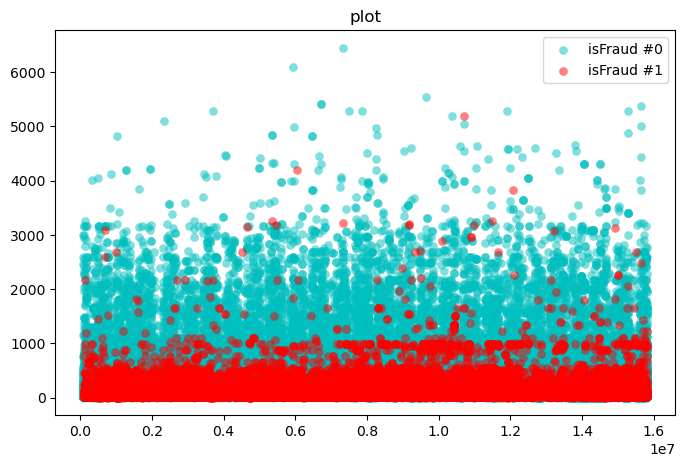

In [49]:
X, y = prep_data(train)
# Plot our data by running our plot data function on X and y
plt.figure(figsize=(8, 5))
plt.title('plot')
plot_data(X, y)

This figure shows the correlation between the TransactionAmt and isFraud. Smaller TransactionAmt tends to be Fraud. 

C:\Users\tnich\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tnich\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


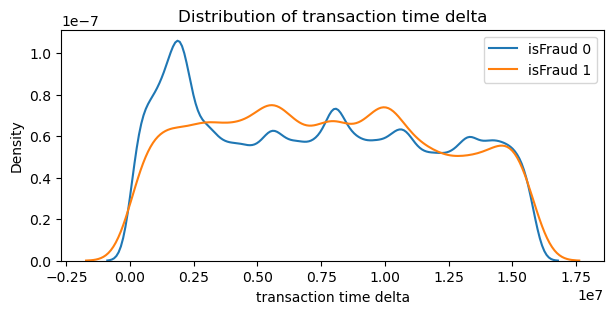

In [32]:
plt.figure(figsize=(7, 3))
sns.distplot(train.loc[train["isFraud"]==0, "TransactionDT"], hist=False, label = "isFraud 0")
sns.distplot(train.loc[train["isFraud"]==1, "TransactionDT"], hist=False, label = "isFraud 1")
plt.xlabel('transaction time delta'); plt.ylabel('Density'); plt.title('Distribution of transaction time delta');plt.legend()

TransactionDT is the difference between each transaction. There is a small significant of frequency transaction for isFraud = 0 (non-fraudulent transaction)

In [34]:
#Creates an hour function for hour of the day, mapped as 0-23.
def hour_feature(df):
    hours = train['TransactionDT'] / (3600)        
    mapped_hours = np.floor(hours) % 24
    return mapped_hours

Text(0, 0.5, 'Number of transactions')

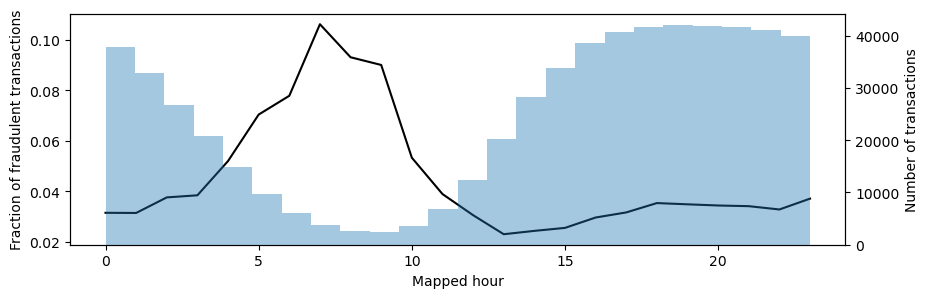

In [36]:
plt.figure(figsize=(10, 3))
train['hours'] = hour_feature(train)
plt.plot(train.groupby('hours').mean()['isFraud'], color='k') #proportion of fraudulent transactions
ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(train['hours'], alpha=0.4, bins=24)
ax.set_xlabel('Mapped hour')
ax.set_ylabel('Fraction of fraudulent transactions') #line
ax2.set_ylabel('Number of transactions') #Bar

This hour-transaction graph clearly represents how time of the day has a strong dependence with the fraud transaction. <br> 
The lower number of transactions, the higher of the proportion of fraud transactions. <br>
Hence will run the correlation on them.

## 2.2. Investigate Data Types

In [15]:
#Review the types of data in train dataset
print(train.dtypes)

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                  int64
C2                  int64
C3                  int64
C4                  int64
C5                  int64
C6                  int64
C7                  int64
C8                  int64
C9                  int64
C10                 int64
C11                 int64
C12                 int64
C13                 int64
C14                 int64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float64
D8          

## 2.3. Investigate possible invalid data

In [16]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32,hours
count,5.905380e+05,590538.000000,5.905380e+05,590538.000000,590538.000000,581605.000000,588973.000000,586279.000000,524832.000000,524832.000000,238267.000000,37627.000000,590538.000000,590538.000000,590538.000000,590538.000000,590538.000000,590538.000000,590538.000000,590538.000000,590538.000000,590538.000000,590538.000000,590538.000000,590538.000000,590538.000000,589269.000000,309743.000000,327660.000000,421616.000000,280697.000000,73187.000000,38917.000000,74926.000000,74926.000000,514516.000000,311251.000000,64717.000000,61952.000000,62187.000000,501425.000000,311251.000000,311251.000000,311251.000000,311251.000000,311251.000000,311251.000000,311251.000000,311251.000000,311251.000000,311251.000000,311251.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,514465.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,421569.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,513442.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,501374.000000,590224.000000,590224.000000,590224.000000,590224.000000,590224.000000,590224.000000,590224.000000,590224.000000,590224.000000,590224.000000,590224.000000,590224.000000,590224.000000,590

From the table description above:
We see V322-V339 lack of too many data. We will ignore them

## 2.4. Handle missing values

In [17]:
train.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552911
P_emaildomain      94456
R_emaildomain     453247
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280795
D3                262878
D4                168922
D5                309841
D6                517351
D7                551621
D8                515612
D9                515612


Some features have a lot of missing values, so we decide to replace it with "-999" for NaN. 

In [18]:
#Replace missing values (number type) with '-999'
numeric_part_of_train = train.select_dtypes(['number'])
na_columns = numeric_part_of_train.columns[numeric_part_of_train.isna().any()].values.tolist()

for column in na_columns:
    train[column].fillna(-999, inplace=True)

# 3. Features Selection

## 3.1. Correlation Analysis

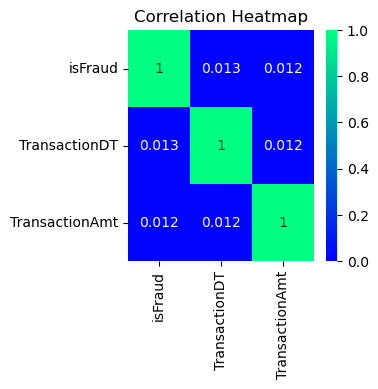

In [45]:
# Find correlation with the Among this 3, we beleived that they are, crucial variables.
test_corr = train[['isFraud','TransactionDT','TransactionAmt']]
corr = test_corr.corr()

plt.figure(figsize=(3,3))
sns.heatmap(corr, annot=True, vmin=0, cmap='winter')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Find correlation with the isFraud and sort
correlations = train.corr()['isFraud'].sort_values()

# Display correlations
print('Most Postive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Postive Correlations:
 id_20      0.138080
id_04      0.139813
id_03      0.139853
D9         0.144114
id_09      0.144141
id_10      0.144141
D14        0.149178
D12        0.154050
D7         0.157434
isFraud    1.000000
Name: isFraud, dtype: float64

Most Negative Correlations:
 addr2   -0.159654
addr1   -0.154174
D11     -0.091630
V11     -0.088347
V10     -0.088346
V1      -0.088315
V6      -0.088313
V8      -0.088313
V2      -0.088312
V4      -0.088311
Name: isFraud, dtype: float64


From the correlation above, we can see that features with realtively higher correlation with the target are:\
Positive cor.: 'D7','D12','D14','id_10','id_09'\
Negative cor.: 'V4', 'V2','V8','V6','V1','V10'.

In [20]:
# Find correlation with the TransactionAmt and sort
correlations = train.corr()['TransactionAmt'].sort_values()

# Display correlations
print('Most Postive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Postive Correlations:
 V137              0.111246
V321              0.122784
V135              0.124998
V319              0.130452
addr1             0.134710
addr2             0.140327
V314              0.143743
V315              0.164064
V313              0.170374
TransactionAmt    1.000000
Name: TransactionAmt, dtype: float64

Most Negative Correlations:
 D12     -0.138276
D6      -0.132728
D13     -0.129484
id_01   -0.125774
id_17   -0.125729
id_20   -0.125404
id_11   -0.124112
V174    -0.122638
V175    -0.122637
V169    -0.122637
Name: TransactionAmt, dtype: float64


Most Correlation TransactionAmt: \
Positive cor.: 'V313','V315','V314','addr2','addr1'\
Negative cor.: 'V169','V175','V174','id_11','id_20'.

In [21]:
# Find correlation with the TransactionDt and sort
correlations = train.corr()['TransactionDT'].sort_values()

# Display correlations
print('Most Postive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Postive Correlations:
 V11              0.319152
V6               0.319152
V2               0.319153
V7               0.319155
V3               0.319157
V5               0.319159
V4               0.319159
D11              0.326592
TransactionID    0.998280
TransactionDT    1.000000
Name: TransactionDT, dtype: float64

Most Negative Correlations:
 V150   -0.214966
V145   -0.191544
V152   -0.187227
V151   -0.187082
V144   -0.186309
V161   -0.185398
V138   -0.185391
V141   -0.185387
V142   -0.185384
V153   -0.185383
Name: TransactionDT, dtype: float64


Most correlation with TransactionDT:\
Postivie cor.:  'D11','V4','V5','V3','V7'\
Negativie cor.: 'V150','V145','V152','V151','V144'.

## 3.2. Investigate object-typed attribute distribution

Correlation Analysis can only analyze attributes with numeric type. Meanwhile, object-type data may could be a good feature too. So i want to visualize the distribution of some object-typed attribute on isFraud=0 and isFraud=1.

**ProductCD, Card4, Card6**

[Text(0.5, 1.0, 'card6: Card category'), Text(0.5, 0, 'isFraud 0')]

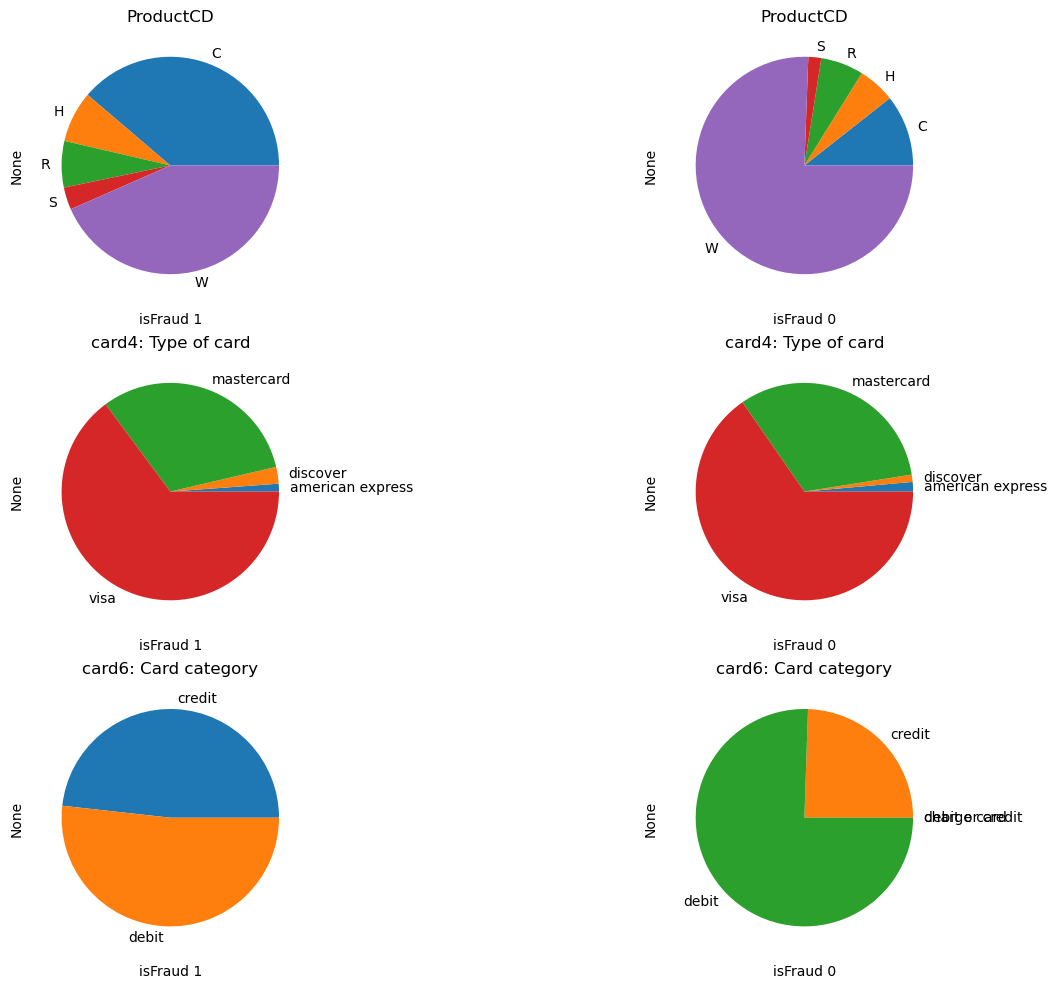

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 12))
#for i, ax in zip(range(1, 5), axes.flat):
train.loc[train["isFraud"]==1, "ProductCD"].reset_index().groupby("ProductCD").size().plot(kind="pie", ax=axes[0,0]).set(
        title="ProductCD", xlabel="isFraud 1")
train.loc[train["isFraud"]==0, "ProductCD"].reset_index().groupby("ProductCD").size().plot(kind="pie", ax=axes[0,1]).set(
        title="ProductCD", xlabel="isFraud 0")    
train.loc[train["isFraud"]==1, "card4"].reset_index().groupby("card4").size().plot(kind="pie", ax=axes[1,0]).set(
        title="card4: Type of card", xlabel="isFraud 1")
train.loc[train["isFraud"]==0, "card4"].reset_index().groupby("card4").size().plot(kind="pie", ax=axes[1,1]).set(
        title="card4: Type of card", xlabel="isFraud 0")
train.loc[train["isFraud"]==1, "card6"].reset_index().groupby("card6").size().plot(kind="pie", ax=axes[2,0]).set(
        title="card6: Card category", xlabel="isFraud 1")
train.loc[train["isFraud"]==0, "card6"].reset_index().groupby("card6").size().plot(kind="pie", ax=axes[2,1]).set(
        title="card6: Card category", xlabel="isFraud 0")


**Purchaser & Receiver Email Domains**

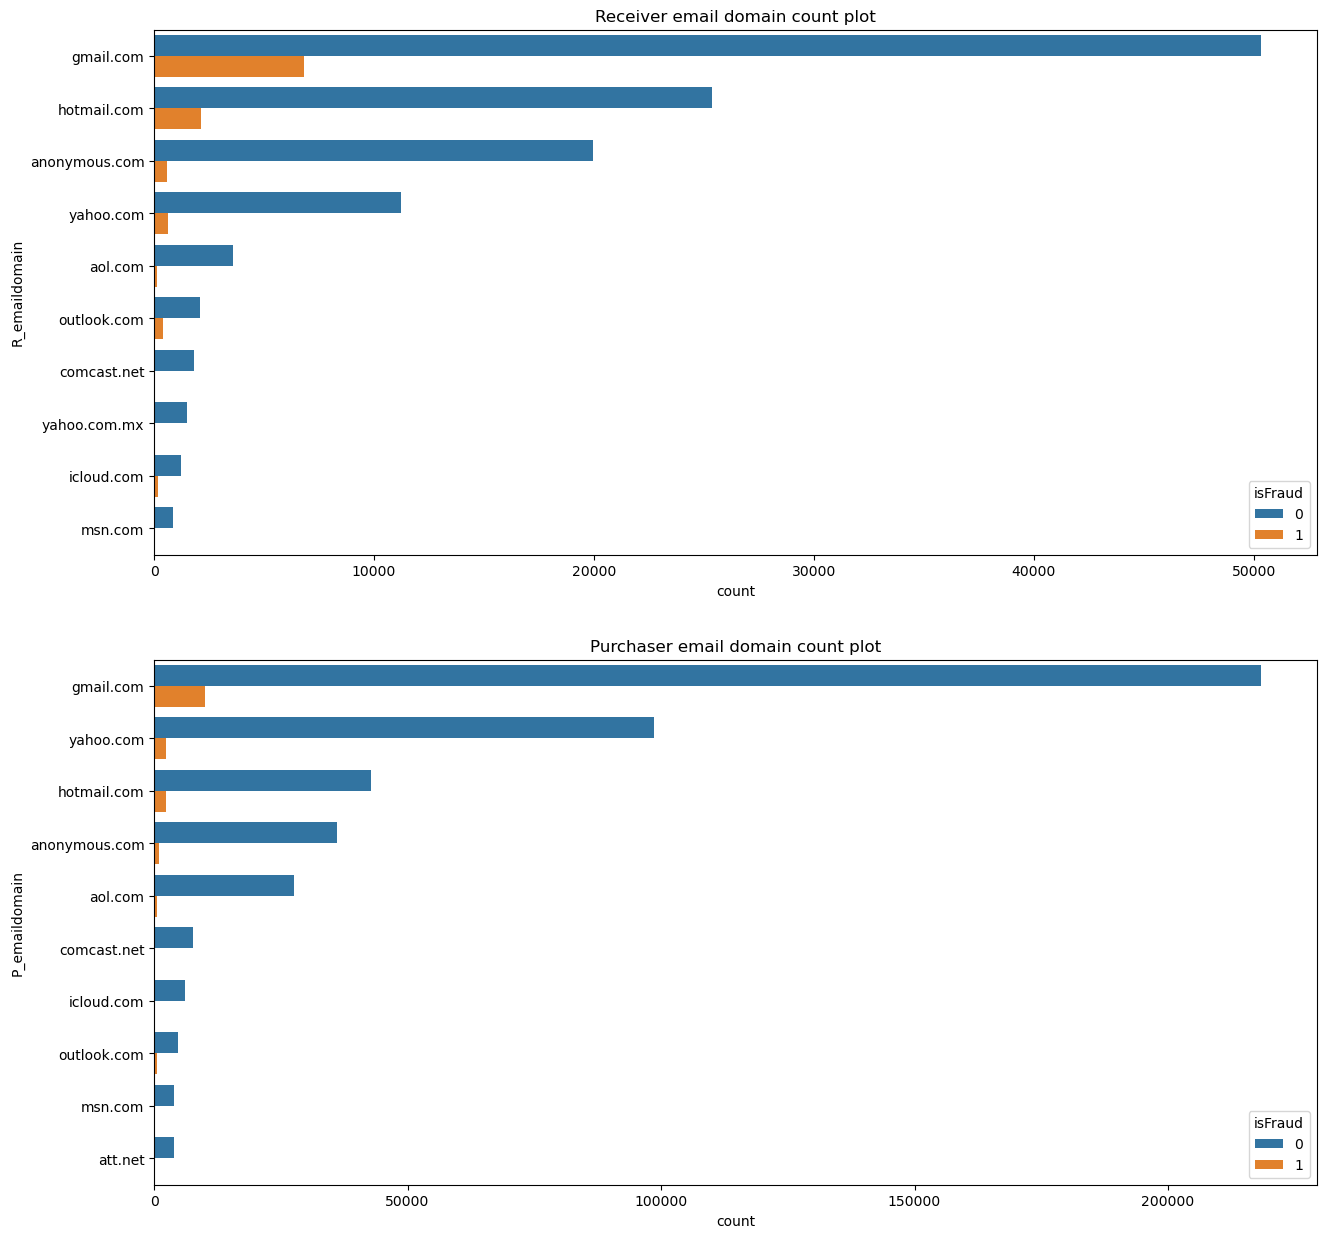

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(15, 15))
sns.countplot(data = train, y = "R_emaildomain", hue = "isFraud", ax=ax1, order = train['R_emaildomain'].value_counts().head(10).index).set(title = "Receiver email domain count plot")
sns.countplot(data = train, y = "P_emaildomain", hue = "isFraud", ax=ax2, order = train['P_emaildomain'].value_counts().head(10).index).set(title = "Purchaser email domain count plot")
plt.show()

## 3.6. Select the Features

From the visuals and correlation: We only select some variable that we see important, hence we will only select only features that we believe they are significant.

In [24]:
train_selected = train[['isFraud','V4', 'V2','V8','V6','V1','V10','V11','D11','addr1','addr2','D7','D12','D14','id_10','id_09','D9','id_03','id_04','id_20','V313','V315','V314','V319','V135','V321','V317','V169','V175','V174','id_11','id_17','id_01','D13','D6','V5','V3','V7','V2','V150','V145','V152','V151','V144','V161','V138','V141','V142','V153','ProductCD','card1','card2','card3','card6','dist1','dist2','R_emaildomain','P_emaildomain']]

# 3.3 Feature Tranformation

### 3.3.1. Transform Categorical Object Typed Attribute

In [25]:
#Only keep important email in R_emaildomain
keep = ['gmail.com','hotmail.com','anonymous.com','yahoo.com']

train_selected.R_emaildomain = [x if x in keep else np.NaN for x in train_selected.R_emaildomain]


C:\Users\tnich\AppData\Local\Temp\ipykernel_6228\1849366727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_selected.R_emaildomain = [x if x in keep else np.NaN for x in train_selected.R_emaildomain]


In [26]:
#Only keep important email in P_emaildomain
keep = ['gmail.com','hotmail.com','anonymous.com', 'yahoo.com','aol.com']

train_selected.P_emaildomain = [x if x in keep else np.NaN for x in train_selected.P_emaildomain]


C:\Users\tnich\AppData\Local\Temp\ipykernel_6228\307090070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_selected.P_emaildomain = [x if x in keep else np.NaN for x in train_selected.P_emaildomain]


In [27]:
#Create dummies/one-hot encoding on every nominal attributes in train dataframe
ProductCD_dummies = pd.get_dummies(train_selected['ProductCD'],prefix='ProductCD')
card6_dummies = pd.get_dummies(train_selected['card6'],prefix='card6')
R_emaildomain_dumies = pd.get_dummies(train_selected['R_emaildomain'],prefix='R_emaildomain')
P_emaildomain_dumies = pd.get_dummies(train_selected['P_emaildomain'],prefix='P_emaildomain')

In [28]:
#Concate the dummies into train dataset
train_selected = pd.concat([train_selected, ProductCD_dummies, card6_dummies,R_emaildomain_dumies,P_emaildomain_dumies], axis=1)

#Drop categorical attribute (before transformation)
train_selected = train_selected.drop(['ProductCD','card6','R_emaildomain','P_emaildomain'], axis=1)

In [29]:
train_selected.head(2)

,isFraud,V4,V2,V8,V6,V1,V10,V11,D11,addr1,addr2,D7,D12,D14,id_10,id_09,D9,id_03,id_04,id_20,V313,V315,V314,V319,V135,V321,V317,V169,V175,V174,id_11,id_17,id_01,D13,D6,V5,V3,V7,V2,V150,V145,V152,V151,V144,V161,V138,V141,V142,V153,card1,card2,card3,dist1,dist2,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card6_charge card,card6_credit,card6_debit,card6_debit or credit,R_emaildomain_anonymous.com,R_emaildomain_gmail.com,R_emaildomain_hotmail.com,R_emaildomain_yahoo.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_gmail.com,P_emaildomain_hotmail.com,P_emaildomain_yahoo.com
0,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,13.0,315.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,1.0,1.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,13926,-999.0,150.0,19.0,-999.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,325.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,2755,404.0,150.0,-999.0,-999.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [30]:
#Remove insignificant values for 'debit or credit' & 'charge card'
train_selected = train_selected.drop(['card6_debit or credit','card6_charge card' ], axis=1)

In [32]:
train_selected.head(2)

,isFraud,V4,V2,V8,V6,V1,V10,V11,D11,addr1,addr2,D7,D12,D14,id_10,id_09,D9,id_03,id_04,id_20,V313,V315,V314,V319,V135,V321,V317,V169,V175,V174,id_11,id_17,id_01,D13,D6,V5,V3,V7,V2,V150,V145,V152,V151,V144,V161,V138,V141,V142,V153,card1,card2,card3,dist1,dist2,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card6_credit,card6_debit,R_emaildomain_anonymous.com,R_emaildomain_gmail.com,R_emaildomain_hotmail.com,R_emaildomain_yahoo.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_gmail.com,P_emaildomain_hotmail.com,P_emaildomain_yahoo.com
0,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,13.0,315.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,1.0,1.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,13926,-999.0,150.0,19.0,-999.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,325.0,87.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,2755,404.0,150.0,-999.0,-999.0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0


As the result of Correlation Analysis, we choose all the variances from the correlation results from isFraud, TransactionAmt, TransactionDT and variables from identity tables: 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'dist1', 'dist2'.

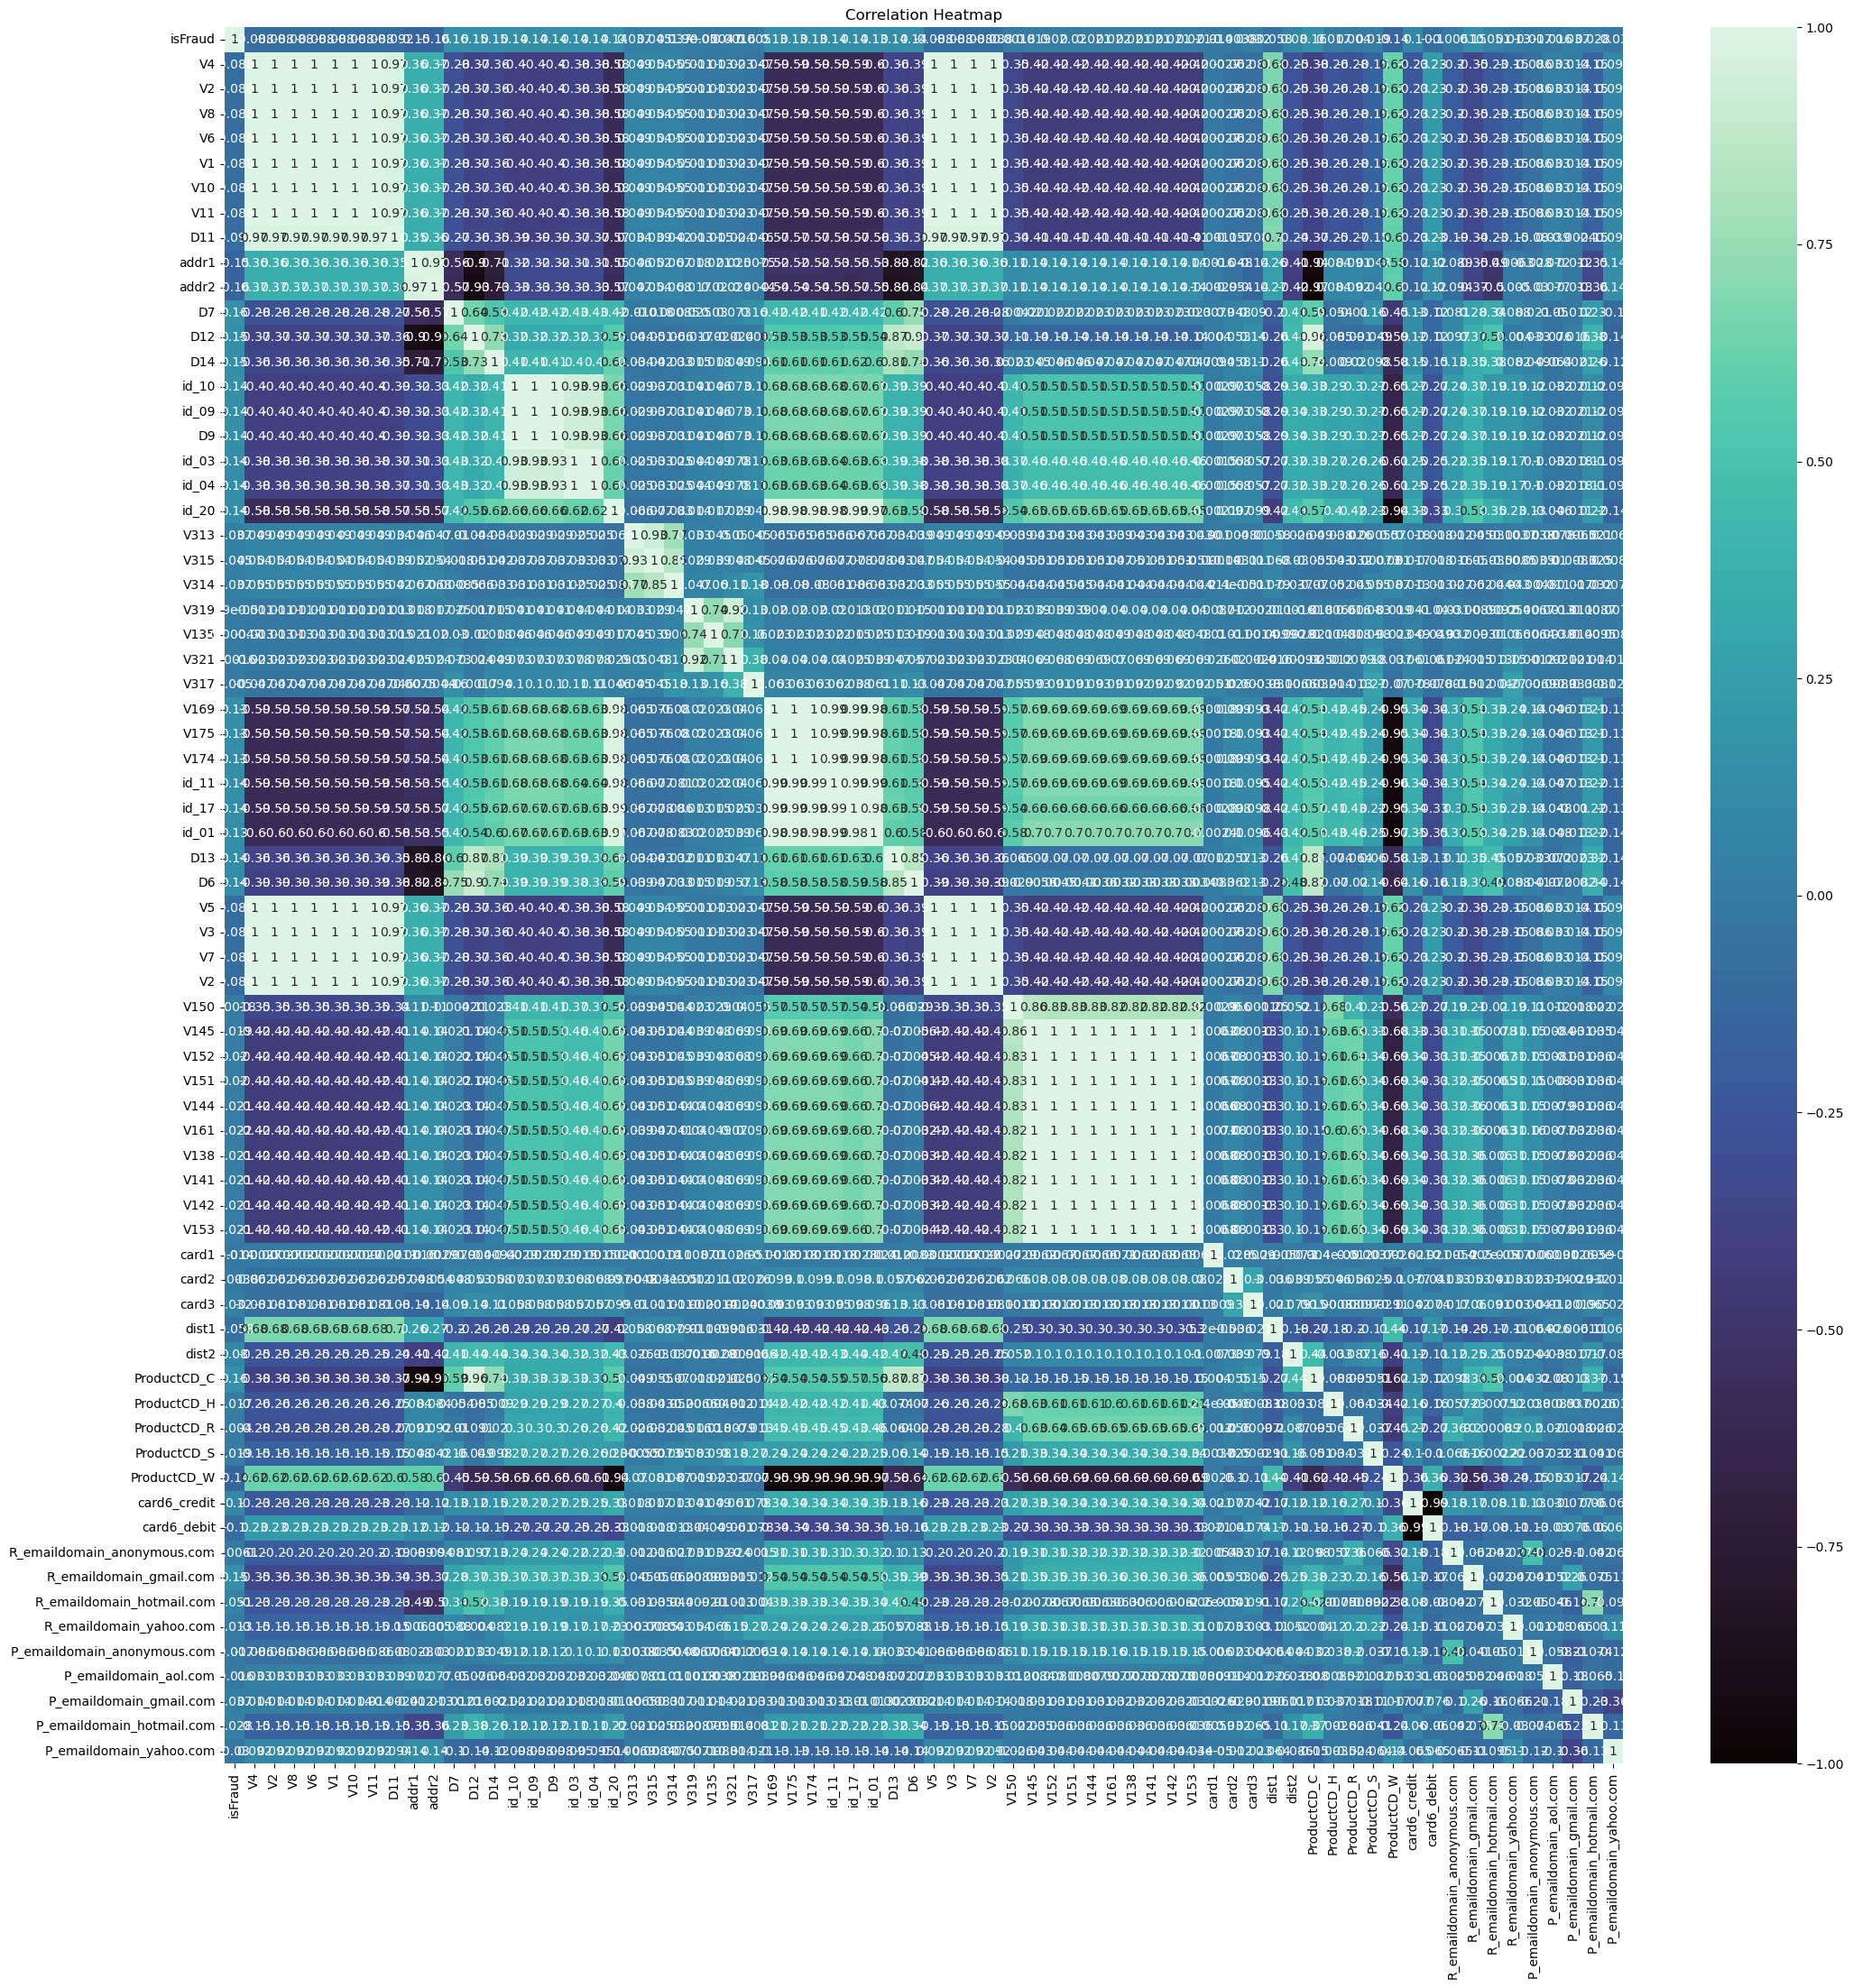

In [33]:
corr = train_selected.corr()

plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, vmin=-1, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
# Save the submission dataframe
train_selected.to_csv(r'C:\Users\tnich\Documents\GitHub\ML\Transaction-fraud2\train_selected.csv', index = False)